In [1]:

!pip install xgboost

In [1]:
!pip install -Iv scikit-learn==0.23.2


  Running command pip subprocess to install build dependencies
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
       ---------------------------------------- 1.2/1.2 MB 6.0 MB/s eta 0:00:00
       ------------------------------------- 986.3/986.3 kB 12.5 MB/s eta 0:00:00
       ------------

Using pip 22.2.2 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.9)
     ---------------------------------------- 7.2/7.2 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [6]:
base_data=pd.read_pickle("modelbase_CV.pkl")
driverset= pd.read_pickle('driverset_18M.pkl')

X_data = base_data.drop(driverset.columns, axis=1)
y = base_data.DPD_60_plus_18

In [10]:
#Split the dataset into train and Test
seed = 7
test_size = 0.3
X_trian, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

In [6]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
#model2 = xgb.XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_trian, y_train)
#train_model2 = model2.fit(X_trian, y_train)

In [8]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
#pred2 = train_model2.predict(X_test)

print('Model 1 XGboost Report')
classification_report(y_test, pred1)
#print('Model 2 XGboost Report %r' % (classification_report(y_test, pred2)))

Model 1 XGboost Report


'              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.93      7761\n           1       0.86      0.29      0.43      1625\n\n    accuracy                           0.87      9386\n   macro avg       0.86      0.64      0.68      9386\nweighted avg       0.87      0.87      0.84      9386\n'

In [9]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
#print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))

Accuracy for model 1: 86.84


Clearly Model 1 performed much better than when we had an estimator

### Let's see what's in Hyperparameter Tunning of XGboost
Based on the work of [Aarshay Jain](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [10]:
#Let's do a little Gridsearch, Hyperparameter Tunning
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [11]:
train_model3 = model3.fit(X_trian, y_train)
pred3 = train_model3.predict(X_test)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))

Accuracy for model 3: 89.64


In [13]:
train_model1.save_model("train_model1.json")
train_model3.save_model("train_model3.json")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dpthlist= [7,8,9]
gammalist= [i/10.0 for i in range(0,5)]
learning_rate= [0.1,0.15,0.2,0.25]

for dpth in dpthlist:
    for gmma in gammalist:
        for lr in learning_rate:
            param_temp = xgb.XGBClassifier(
             learning_rate =lr,
             n_estimators=1000,
             max_depth=dpth,
             min_child_weight=1,
             gamma=gmma,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
            temp = param_temp.fit(X_trian, y_train)
            #train_model4 = gsearch.fit(X_trian, y_train)
            temp_pred = temp.predict(X_test)
            print("Accuracy for model , depth " + str(dpth) + ",gamma" + str(gmma) + ",learing rate "  +  str(lr)+ "is " +  
                  str((accuracy_score(y_test, temp_pred) * 100)) )
            temp.save_model("train_model_dpth_gamma_lr_" + str(dpth) + str(gmma)  +  str(lr)+ ".json")





Accuracy for model , depth 7,gamma0.0,learing rate 0.1is 89.4630300447475
Accuracy for model , depth 7,gamma0.0,learing rate 0.15is 89.49499254208395
Accuracy for model , depth 7,gamma0.0,learing rate 0.2is 89.19667590027701
Accuracy for model , depth 7,gamma0.0,learing rate 0.25is 89.14340507138292
Accuracy for model , depth 7,gamma0.1,learing rate 0.1is 89.55891753675688
Accuracy for model , depth 7,gamma0.1,learing rate 0.15is 89.44172171318986
Accuracy for model , depth 7,gamma0.1,learing rate 0.2is 89.33518005540166
Accuracy for model , depth 7,gamma0.1,learing rate 0.25is 89.07948007671
Accuracy for model , depth 7,gamma0.2,learing rate 0.1is 89.43106754741103
Accuracy for model , depth 7,gamma0.2,learing rate 0.15is 89.45237587896868
Accuracy for model , depth 7,gamma0.2,learing rate 0.2is 89.22863839761347
Accuracy for model , depth 7,gamma0.2,learing rate 0.25is 89.2499467291711
Accuracy for model , depth 7,gamma0.3,learing rate 0.1is 89.31387172384402
Accuracy for model , dep

In [20]:
model_vf = xgb.Booster()
model_vf.load_model("train_model_dpth_gamma_lr_80.30.1.json")

In [ ]:
model_vf = xgb.Booster()
model_vf.load_model("train_model_dpth_gamma_lr_80.30.1.json")
feature_important = model_vf.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
top_features   = keys[0:600]
seed = 7
test_size = 0.3
X_trian, X_test, y_train, y_test = train_test_split(X_data[top_features], y, test_size=test_size, random_state=seed)
param_temp = xgb.XGBClassifier(
             learning_rate =0.1,
             n_estimators=1000,
             max_depth=8,
             min_child_weight=1,
             gamma=0.3,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
temp = param_temp.fit(X_trian, y_train)
            #train_model4 = gsearch.fit(X_trian, y_train)
temp_pred = temp.predict(X_test)
print("Accuracy for model , str((accuracy_score(y_test, temp_pred) * 100)) )
temp.save_model("train_model_top_feat_dpth_gamma_lr" + ".json")


In [39]:
X_test.shape , X_test.shape


(9386, 593)

In [34]:
print("Accuracy for model : ", str((accuracy_score(y_test, temp_pred) * 100)) )
temp.save_model("train_model_top_feat_dpth_gamma_lr" + ".json")


Accuracy for model :  89.64415086298743


In [36]:
temp_pred = temp.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

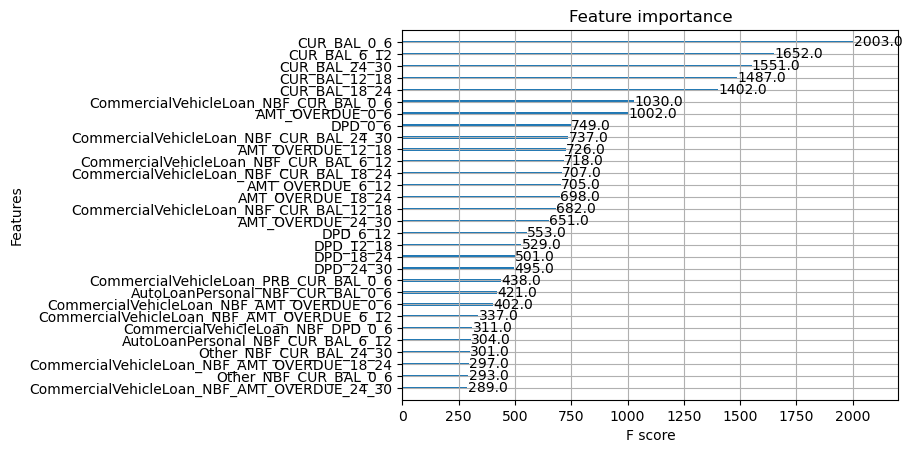

In [18]:
from xgboost import XGBClassifier, plot_importance
plot_importance(model_vf, max_num_features = 30)
#pyplot.show()

In [19]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[5,6,7,8],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=500, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

train_model4 = gsearch.fit(X_trian, y_train)
pred4 = train_model4.predict(X_test)
train_model4.save_model("train_model4.json")
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))

TypeError: __init__() got an unexpected keyword argument 'iid'

In [ ]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=180, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

train_model5 = gsearch2b.fit(X_trian, y_train)
pred5 = train_model5.predict(X_test)
train_model3.save_model("train_model3.json")
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))

In [14]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_trian, y_train)
pred7 = train_model7.predict(X_test)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test, pred7) * 100))

Accuracy for model 7: 72.29


In [15]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_trian, y_train)
pred8 = rfc_model.predict(X_test)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, pred8) * 100))

Accuracy for Random Forest Model: 73.59


**Naive XGBoost Perform well than RandomForest**